<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/HW2_DL_Mequanent_110761504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **DL-HW2**
*   **Mequanent Argaw Muluneh**
*   **110761504**





In [2]:
# Clone the repository to access the datasets for Q 1.
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 2.313s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [2]:
import numpy as np
import pandas as pd
import random
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

# 1.
(20%) Please construct a neural net (with its architecture shown below) and train it on ‘train.mat.” The activation function must be used in the two hidden layers and the output layer. You can construct and optimize your network model by using any off-the-shelf functions. Report the test error on the test set ‘test.mat’ (percentage of misclassified test samples).

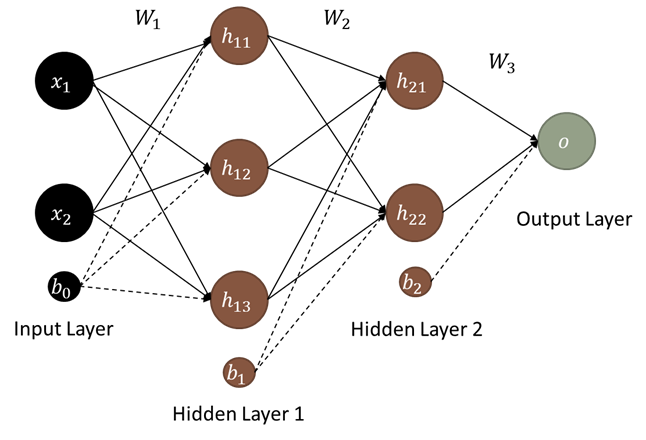

## Read Dataset

In [4]:
train = loadmat(r"HW2/train.mat")
test = loadmat(r"HW2/test.mat")
train_df = pd.DataFrame()
train_df['x1'] = train['x1'].flatten()
train_df['x2'] = train['x2'].flatten()
train_df['y'] = train['y']

test_df = pd.DataFrame()
test_df['x1'] = test['x1'].flatten()
test_df['x2'] = test['x2'].flatten()
test_df['y'] = test['y']

In [5]:
train_df.shape, test_df.shape

((70, 3), (30, 3))

In [6]:
model_1 = keras.Sequential()
model_1.add(Dense(3, input_shape=(2,), activation='relu',
                  use_bias=True, bias_initializer='ones'))
model_1.add(Dense(2, activation='relu', use_bias=True, bias_initializer='ones'))
model_1.add(Dense(1, activation='sigmoid', use_bias=True, bias_initializer='zeros'))

model_1.compile(optimizer='adam', metrics=['accuracy'],
              loss=keras.losses.BinaryCrossentropy(from_logits=True))
model_1.summary()

x = np.column_stack((train_df.x1.values, train_df.x2.values))
x_test = np.column_stack((test_df.x1.values, test_df.x2.values))

model_1.fit(x, train_df.y.values, batch_size=10, epochs=400, validation_split=0.1, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [35]:
evaluation = model_1.evaluate(x_test, test_df.y.values)
error_rate = 1 - evaluation[1]
print(f"Prediction error rate on test data is: {round(error_rate*100, 2)}%")

1/1 [==============================] - 0s 23ms/step - loss: 0.1206 - accuracy: 0.9667
Prediction error rate on test data is: 3.33%


# 2

## 2.1
(20%) You are asked to construct a classification model based on multi-layer convolutional neural networks (at least five layers) for digit recognition. Please report the prediction accuracy for the test set. (Hint: its loss function could be cross entropy)

In [3]:
def preprocess():
  # load dataset
  (trainX, trainy), (testX, testy) = mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  trainX = trainX.astype('float') / 255
  testX = testX.astype('float') / 255

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX, testX, trainy, testy

xtrain, xtest, ytrain, ytest = preprocess()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def build_cnn_model(x_train, y_train):
  input_shape = x_train.shape[1:]
  model = keras.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)

  return model

In [5]:
model_2_1 = build_cnn_model(xtrain, ytrain)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                        

In [6]:
evaluation_2 = model_2_1.evaluate(xtest, ytest, verbose=0)
accuracy = round(evaluation_2[1]*100, 2)
print(f"Test accuracy: {accuracy}%")

Test accuracy: 99.37%


## 2.2
(15%) Please randomly set 5%, 10%, and 15% of pixels to 255 for each image and evaluate the test set using the model you trained on clean images from 2.1. Report the prediction accuracies for the three different corruption rates. Compare your results with those in Question 2.1. What do you find?

In [7]:
def corrupt(data, corrupt_lv):
  #corrupt_lv = 0.05    #% using 5% and training data as an example
  img_size = 28*28
  corrupted = []
  for i in range(len(data)):
    ran_seq = random.sample([n for n in range(img_size)], int(img_size*corrupt_lv))
    x = data[i].reshape(-1, img_size)
    x[0, ran_seq] = 1 # 1 because already normalized by 255
    x = x.reshape((28, 28, 1))
    corrupted.append(x)
  return np.array(corrupted)

In [8]:
xtest_corrupted_5 = corrupt(xtest.copy(), 0.05)
xtest_corrupted_10 = corrupt(xtest.copy(), 0.1)
xtest_corrupted_15 = corrupt(xtest.copy(), 0.15)

In [9]:
# To check if the corrupting method works properly
np.sum(xtest_corrupted_5 != xtest), np.sum(xtest_corrupted_10 != xtest), np.sum(xtest_corrupted_15 != xtest)

(387222, 774449, 1161537)

In [9]:
# Evaluate the model in 2.1 with the corrupted testing datasets
score_5 = model_2_1.evaluate(xtest_corrupted_5, ytest, verbose=0)
score_10 = model_2_1.evaluate(xtest_corrupted_10, ytest, verbose=0)
score_15 = model_2_1.evaluate(xtest_corrupted_15, ytest, verbose=0)

In [10]:
print(f"Test accuracy of model in 2.1 with NO noise is: {round(evaluation_2[1]*100, 2)}%")
print(f"Test accuracy of the model in 2.1 with 5% noise is: {round(score_5[1]*100, 2)}%" )
print(f"Test accuracy of the model in 2.1  with 10% noise is: {round(score_10[1]*100, 2)}%")
print(f"Test accuracy of the model in 2.1  with 15% noise is: {round(score_15[1]*100, 2)}%")

Test accuracy of model in 2.1 with NO noise is: 99.37%
Test accuracy of the model in 2.1 with 5% noise is: 94.4%
Test accuracy of the model in 2.1  with 10% noise is: 82.3%
Test accuracy of the model in 2.1  with 15% noise is: 69.71%


The test accuracy of the model in 2.1 before introducing any noise to the dataset is better than all others.
Its prediction accuracy lowers down as the percentage of the noise introduced to the testing dataset increases. The accuracies not only lower down but also far apart one another. 

## 2.3
(15%) Following Question 2.2, please re-train your model with the corrupted data (5%, 10%, and 15% separately) and re-evaluate the test set.
Report the prediction accuracies also for the three different corruption rates. Compare your results with those from 2.1 and 2.2. What do you find?


In [12]:
# get corrupted training data
xtrain_corrupted_5 = corrupt(xtrain.copy(), 0.05)
xtrain_corrupted_10 = corrupt(xtrain.copy(), 0.1)
xtrain_corrupted_15 = corrupt(xtrain.copy(), 0.15)

Train a CNN model with the same structure as in 2.1 by using the $5\%, 10\%$, and $15\%$ corrupted datasets and see the corresponding prediction accuracy for the same percentage of corrupted testing data.

In [13]:
''' model_x is a model trained with x% corrupted training data to be tested 
  with the corresponding x% corrupted test dataset'''
model_5 = build_cnn_model(xtrain_corrupted_5, ytrain) # method defined in 2.1
model_10 = build_cnn_model(xtrain_corrupted_10, ytrain) 
model_15 = build_cnn_model(xtrain_corrupted_15, ytrain) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                      

In [14]:
# get the accuracies of each model on each test set
acc_5 = model_5.evaluate(xtest_corrupted_5, ytest)
acc_10 = model_10.evaluate(xtest_corrupted_10, ytest)
acc_15 = model_15.evaluate(xtest_corrupted_15, ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0497 - accuracy: 0.9912


In [39]:
# display the accuracies 
print('Accuracy of each model trained and tested with the same percentage')
print('*'*50)
print(f'For 5% corrupted training dataset and 5% corrupted testing dataset: {round(acc_5[1]*100, 2)}%')
print(f'For 10% corrupted training dataset and 10% corrupted testing dataset: {round(acc_10[1]*100, 2)}%')
print(f'For 15% corrupted training dataset and 15% corrupted testing dataset: {round(acc_15[1]*100, 2)}%')

Accuracy of each model trained and tested with the same percentage
**************************************************
For 5% corrupted training dataset and 5% corrupted testing dataset: 99.27%
For 10% corrupted training dataset and 10% corrupted testing dataset: 99.33%
For 15% corrupted training dataset and 15% corrupted testing dataset: 99.12%


Based on the values in the above table the models trained with the corrupted images have overall accuracy better than the model developed in 2.1 which was trained with the normal images. In addition, the observed accuracies are relatively closer one another than those observed in 2.2. When the model in 2.1 trained with original training dataset was tested with corrupted images its accuracy shows significant decrease. But the models trained with corrupted images predicted better on the corrupted test images.  

## 2.4
(15%) Following Question 2.2, please construct ONE restoration model (also convolutional neural networks) that inputs a corrupt image and outputs its restored image. (Hint: its loss function could be MAE or MSE)

In [16]:
# concatenate the training data 3 times to match with the three pecentages below
xtrain_3_fold = np.concatenate((xtrain, xtrain), axis=0)
xtrain_3_fold = np.concatenate((xtrain_3_fold, xtrain), axis=0)

# concatenate the three percentages to have a single training dataset
xtrain_corrupted_all = np.concatenate((xtrain_corrupted_5, xtrain_corrupted_10), axis=0)
xtrain_corrupted_all = np.concatenate((xtrain_corrupted_all, xtrain_corrupted_15), axis=0)
xtrain_3_fold.shape, xtrain_corrupted_all.shape

((180000, 28, 28, 1), (180000, 28, 28, 1))

In [18]:
# do the same for testing dataset also
xtest_3_fold = np.concatenate((xtest, xtest), axis=0)
xtest_3_fold = np.concatenate((xtest_3_fold, xtest), axis=0)

xtest_corrupted_all = np.concatenate((xtest_corrupted_5, xtest_corrupted_10), axis=0)
xtest_corrupted_all = np.concatenate((xtest_corrupted_all, xtest_corrupted_15), axis=0)
xtest_3_fold.shape, xtest_corrupted_all.shape

((30000, 28, 28, 1), (30000, 28, 28, 1))

In [17]:
# a function to display corrupted and restored images in parallel
def display_images(image1, image2):
  plt.figure(figsize=(40, 4))
  i, indices = 0, np.random.randint(len(image1), size=10)
  for j in indices:
      # display first image
      ax = plt.subplot(3, 20, i + 1)
      plt.imshow(image1[j].reshape(28, 28), cmap="binary")

      # display second image
      ax = plt.subplot(3, 20, 40 +i+ 1)
      plt.imshow(image2[j].reshape(28, 28), cmap="binary")

      i += 1
  plt.show()

References used for the restoring model:
1. https://keras.io/examples/vision/autoencoder/
2. https://www.youtube.com/watch?v=Sm54KXD-L1k
3.
https://github.com/bnsreenu/python_for_microscopists/blob/master/086--auto_denoise_mnist.py

In [19]:
# Image restoration model trained with the 5% corrupted images
restoring_model = Sequential()
# Encoding part
restoring_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))

# Decoding part
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(32, (3, 3), activation='relu'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

restoring_model.compile(optimizer='adam', loss='mean_squared_error')
restoring_model.summary()

restoring_model.fit(xtrain_corrupted_all, xtrain_3_fold, epochs=200, batch_size=256, shuffle=True,
          validation_data=(xtest_corrupted_all, xtest_3_fold)) 
restoring_model.evaluate(xtest_corrupted_all, xtest_3_fold) 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 8)         

0.008671579882502556

313/313 [==============================] - 1s 2ms/step


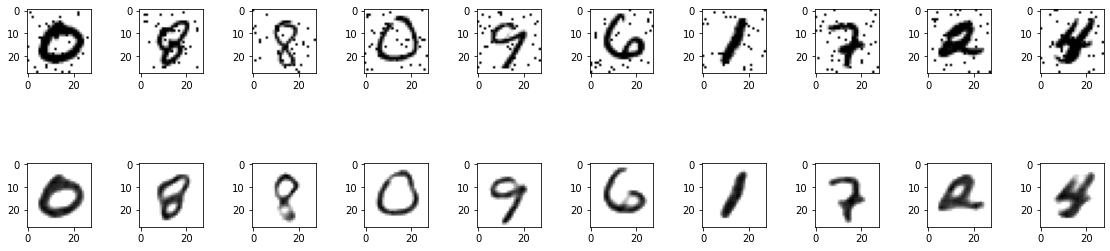

In [20]:
# Restore and see the 5% corrupted test dataset
restored_5 = restoring_model.predict(xtest_corrupted_5)
display_images(xtest_corrupted_5, restored_5)

313/313 [==============================] - 1s 2ms/step


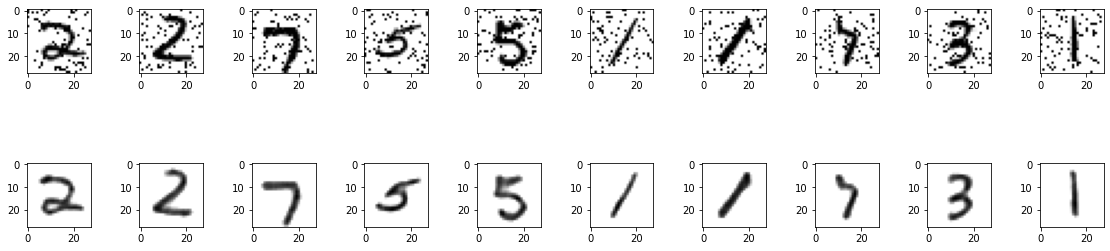

In [21]:
# Restore and see the 10% corrupted test dataset
restored_10 = restoring_model.predict(xtest_corrupted_10)
display_images(xtest_corrupted_10, restored_10)

313/313 [==============================] - 1s 2ms/step


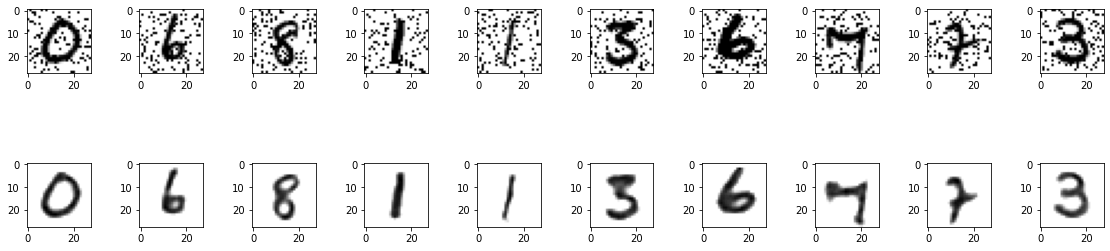

In [22]:
# Restore and see the 15% corrupted test dataset
restored_15 = restoring_model.predict(xtest_corrupted_15)
display_images(xtest_corrupted_15, restored_15)

## 2.5
(15%) Following Question 2.4, please evaluate the restored test set using the model you trained on clean images in Question 2.1. Report the prediction accuracies for restored images separately at the three different corruption rates. What do you find?

In [37]:
evaluation_5 = model_2_1.evaluate(restored_5, ytest, verbose=0)
print(f"Test accuracy on restored images from 5% noise: {round(evaluation_5[1]*100, 2)}%")

evaluation_10 = model_2_1.evaluate(restored_10, ytest, verbose=0)
print(f"Test accuracy on restored images from 10% noise: {round(evaluation_10[1]*100, 2)}%")

evaluation_15 = model_2_1.evaluate(restored_15, ytest, verbose=0)
print(f"Test accuracy on restored images from 15% noise: {round(evaluation_15[1]*100, 2)}%")

Test accuracy on restored images from 5% noise: 96.35%
Test accuracy on restored images from 10% noise: 96.26%
Test accuracy on restored images from 15% noise: 96.3%


The following table shows the comparison of the test accuracies of the model in 2.1 on the corrupted images and the restored images. The test accuracies on the restored images are better than the accuracies observed in the corrupted images. In addition, the accuracies observed from the restored images are closer to one another than those observed from the corrupted images. 